<a href="https://colab.research.google.com/github/PepoAmbriz/Metodos-numericos/blob/main/NumericalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Some Numerial Methods 


In [10]:
#NUMERICAL INTEGRATION, NEWTON COTES
from scipy.integrate import newton_cotes
from math import sin, pi
import numpy as np
def f(x):
    return x**4
#def f(x):
    #return 2/(x-4)
#def f(x):
    #return x**2*lnx
#def f(x):
    #return x**2*e**(-x)
#def f(x):
    #return 2*x/(x**2-4)
#def f(x):
    #return x/(x**2-4)
#def f(x):
    #return x*sin(x)
##def f(x):
    #return e**(3*x)*sin(2*x)
  
a = 0.5
b = 1

for N in [1, 2,]:
    x = np.linspace(a, b, N + 1)
    an, B = newton_cotes(N, 1)
    dx = (b - a) / N
    ap = dx * np.sum(an * f(x))
    
    print('{:2d}  {:10.9f}  '.format(N, ap))



 1  0.265625000  
 2  0.194010417  


In [11]:
#NCOTES
from scipy.integrate import newton_cotes
from math import sin, pi, e
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial


def f(x):
    return np.sin(x)
  
  
a = 0
b = np.pi/4

#N. cotes cerradas
print("Cerradas\n N   Integral      Error   \n")
for N in [1, 2, 3, 4]:
    x = np.linspace(a, b, N + 1)
    an, E= newton_cotes(N,1)
    dx = (b - a) / N
    ap = dx * np.sum(an * f(x))
    print('{:2d}  {:10.8f}  {:10.8f}'.format(N, ap, E))
    
an=0

  #N. cotes abiertas, forma larga :( xd

print("\nAbiertas\n N   Integral      Error   \n")

x0= 0
x1= np.pi/4
N = 0
h = (x1-x0)/(N+2)
a = x0 + h
b = x1 - h
ap= 2*h*f(a)
E=h**3/3

print('{:2d}  {:10.8f}  {:10.8f}'.format(N, ap,E))
N=1
h = (x1-x0)/(N+2)
a = x0 + h
b = x1 - h
ap=3/2*h*(f(a)+f(a+h))
E=3*h**3/4
print('{:2d}  {:10.8f}  {:10.8f}'.format(N, ap,E))

N=2
h = (x1-x0)/(N+2)
a = x0 + h
b = x1 - h
ap=4/3*h*(2*f(a)-f(a+h)+2*f(a+2*h))
E=14*h**5/45

print('{:2d}  {:10.8f}  {:10.8f}'.format(N, ap,E))
N=3
h = (x1-x0)/(N+2)
a = x0 + h
b = x1 - h
ap=5/24*h*(11*f(a)+f(a+h)+f(a+2*h)+11*f(a+3*h))
E=95*h**5/144
print('{:2d}  {:10.8f}  {:10.8f}'.format(N, ap,E))

    #los errores se dan para 1 que es el max de senos y cosenos, 
    #que son las n derivadas de f en este caso
    


Cerradas
 N   Integral      Error   

 1  0.27768018  -0.08333333
 2  0.29293264  -0.01111111
 3  0.29291070  -0.03750000
 4  0.29289318  -0.00846561

Abiertas
 N   Integral      Error   

 0  0.30055886  0.02018638
 1  0.29798754  0.01345759
 2  0.29285866  0.00009080
 3  0.29286923  0.00006309


-0.15268184659588457 + (1.176143201623286)cos4x + (0.047542784699089236)cos1x + (0.686211436074576)cos2x + (-1.216913269932927)cos3x + (-0.0)sin0x + (-0.8179387079519562)sin1x + (--0.1802449973662844)sin2x + (--0.2753402263628329)sin3x + (-0.0)sin4x + 

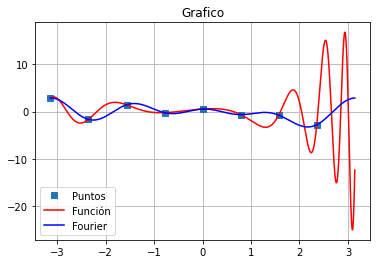

In [12]:
#FAST FOURIER TRANSFORM, TO APROXIMATE FUNCTIONS
from scipy.fftpack import fft
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Definimos la funcion

#3A
#def f(x):
    #r = mt.pi*(x - mt.pi)
    #return r

#3B
#def f(x):
   # r = abs(x)
    #return r

#3C
#def f(x):
    #r = np.cos(mt.pi*x) - 2*np.sin(mt.pi*x)
    #return r

#3D
def f(x):
    r = x*np.cos(x**2) + np.exp(x)*np.cos(np.exp(x))
    return r

#Obtenemos los puntos a evaluar
x = np.arange(-mt.pi, mt.pi, mt.pi/4) 

#Evaluamos la función y hacemos fft que saca cks
y = f(x)
fy = fft(y)

#convertimos las parte real y la parte imaginaria de las ck en las ak y las bk
for i in range(8):
    fy[i] = fy[i]*(-1)**(i)/4
    
#El a0 y el am van divididos entre dos, no solo entre m

#aqui se imprime
print(f"{fy[0].real/2} + ({fy[4].real/2})cos4x +", end = " ")
for i in range(1, 4, 1):
    print(f"({fy[i].real})cos{i}x +", end=" ")
for i in range(0, 5, 1):
    print(f"(-{fy[i].imag})sin{i}x +", end=" ")

def interpolation(x):
    R = fy[0].real/2 + fy[4].real*mt.cos(4*x)/2
    for i in range(1, 4, 1):
        R += fy[i].real*mt.cos(i*x)
    for i in range(0, 5, 1):
        R += -fy[i].imag*mt.sin(i*x)
    return R

xTry = np.arange(-mt.pi, mt.pi, 0.001)
fyTry = np.arange(-mt.pi, mt.pi, 0.001)
j = 0
for i in xTry:
    fyTry[j] = interpolation(xTry[j])
    j += 1
    
    #Para graficar
xTry = np.arange(-mt.pi, mt.pi, 0.001)
plt.plot(x, y, "s", label="Puntos")
plt.plot(xTry, f(xTry), "r", label = "Función")
plt.plot(xTry, fyTry, "b",label = "Fourier")

plt.legend(loc = "lower left")
plt.title("Grafico")
plt.grid()
#Agradecimiento a Missael por su ayuda con la codificación

Text(0.5, 1.0, 'Puntos donde terminó el borracho con frecuencias')

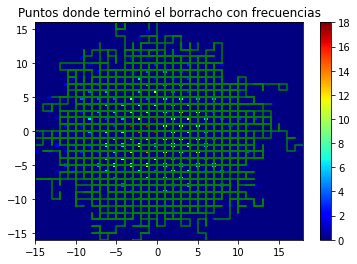

In [19]:
#A random walker, not a numerical method strictly
import numpy as np
import matplotlib.pyplot as plt
#Simulación de Borracho.
N=1000
n=50
x=np.zeros(N)
y=np.zeros(N)
tx=np.zeros(n)
ty=np.zeros(n)
a=0
o=0

#1adelante,2atras,3derecha,4izquierda
for i in range(N):
  a=0
  o=0
  for j in range(n):
    #las probabilidades deben sumar 1
    valor=np.random.choice(np.arange(1, 5), p=[0.25, 0.25, 0.25, 0.25])
    if valor==1:
      o=o+1
    if valor==2:
      o=o-1
    if valor==3:
      a=a+1
    if valor==4:
      a=a-1
    tx[j]=a
    ty[j]=o
  plt.plot(tx, ty,'-',color='g')#Para poner la trayectoria, aunque hace -
  x[i]=a                        #programa un poco lento
  y[i]=o

#plt.plot(x, y,'.', label="Final",color='y')



plt.hist2d(x, y, bins=(65, 65), cmap=plt.cm.jet)

plt.colorbar()

#plt.axis([-n,n,-n,n])#para n pequeña, mejor poner limites en función de n
#plt.legend(loc = "upper right")#n pequeña es hasta 20 XD
plt.title("Puntos donde terminó el borracho con frecuencias")



1   0.10000008055236255
2   3.2415926610446824
3   6.383185313489317
4   9.524777966689376
Los 5 valores En=  [    0. -1000. -1000. -1000. -1000.]


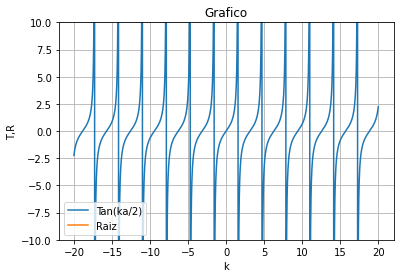

In [14]:
#Solución de la ecuación de eigen-valores para el problema del pozo cuadrado FINITO
#use secante
import numpy as np
import math as ma
import matplotlib.pyplot as plt

x=np.arange(-20.0,20.0,0.0001)
E=np.zeros(5)
V0=1000
m=1
a=2
x0=0.1   #no debe ser cero
x1=np.pi/2
hbar=0.000001
tol=0.0001
N=25
alpha=pow(2*m*V0/hbar**2,0.5)

def T(k):
  return np.tan(k*a/2)
def R(k):
  return pow(alpha**2/k**2-1,0.5)
def f(k):
  return T(k)-R(k)

def Secante(c,b,tol,N,f):
    x0=c*2/a
    x1=b*2/a

    #print(0,x0,x1)
    i=1
    
    while i<=N:
        x= x1-(x1-x0)* f(x1)/(f(x1)-f(x0))  

       # print(i,x)
        if abs(x-x1)<tol:
            return x
        i=i + 1
        x0=x1    # redefinir x0
        x1=x     #redefinir x1
    print('El metodo fracaso despues de %d iteraciones' %N)

for i in range(1,5):
  k=Secante(x0,x1,tol,N,f)
  print(i," ",k)
  E[i]=k**2.0*hbar**2.0/(2.0*m)-V0
  x0=x0+np.pi
  x1=x1+np.pi


print("Los 5 valores En= ",E)

plt.plot(x*a/2,T(x), "-", label="Tan(ka/2)")
plt.plot(x*a/2,R(x),  "-", label = "Raiz")

#plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel("k")
plt.ylabel("T,R")
plt.legend(loc = "lower left")
plt.title("Grafico")
plt.grid()

  



ti        wi          yi        Error

0.2  1.20000000  1.25293063   0.05293063
0.4  1.49714069  1.57122546   0.07408477
0.6  1.82288985  1.87508691   0.05219706
0.8  2.09013093  2.07891804   0.01121289
1.0  2.21938366  2.11797955   0.10140412
1.2  2.16437830  1.96998440   0.19439390
1.4  1.92839546  1.66424768   0.26414778
1.6  1.56563584  1.27497993   0.29065591
1.8  1.16674396  0.90050882   0.26623514
2.0  0.83283938  0.63487532   0.19796406
2.2  0.64622756  0.54078810   0.10543946
2.4  0.64706926  0.63246726   0.01460200
2.6  0.82330263  0.87362087   0.05031824
2.8  1.11671463  1.19079623   0.07408160
3.0  1.44274759  1.49733567   0.05458808
3.2  1.71720534  1.71983722   0.00263188
3.4  1.88097697  1.81847856   0.06249841
3.6  1.91488153  1.79494390   0.11993763
3.8  1.84036455  1.68612955   0.15423500
4.0  1.70675081  1.54672780   0.16002301
4.2  1.57033622  1.42748793   0.14284830
4.4  1.47320310  1.35716394   0.11603916
4.6  1.42939920  1.33450666   0.09489254
4.8  1.42316961  1

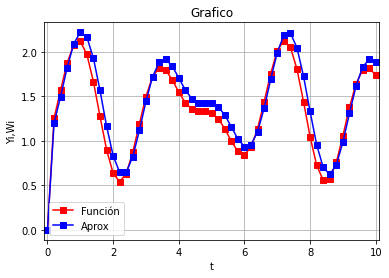

In [15]:
#EULER NUMERICAL DIFFERENTATION
import numpy as np
import math as ma
import matplotlib.pyplot as plt

def g(t):
  #Soluciones a las ecuaciones diferenciales anteriores
#Solución a (a)
 # return (1/5)*t*pow(np.e,3*t)-(1/25)*pow(np.e,3*t)+(1/25)*pow(np.e,-2*t)
#Solución a (b)
  #return t+(1/(1-t))
#Solución a (c)
  #return t*ma.log(t)+2*t
#Solución a (d)
  return (1/2)*ma.sin(2*t)-(1/3)*ma.cos(3*t)+(4/3)
def f(t,y):
   #Función del ejercicio 1 (a)
   # return t*np.e**(3*t)-2*y
  #Función del ejercicio 1 (b)
   #return 1+pow(t-y,2)
  #Función del ejercicio 1 (c)
    #return 1+(y/t)
  #Función del ejercicio 1 (d)
    return np.cos(2*t)+np.sin(3*t)

a=0
b=10
N=50
alp=1

Y=np.zeros(N+1)
W=np.zeros(N+1)
T=np.zeros(N+1)
E=0
y=0
h=(b-a)/N
t=a
w=alp
print("ti        wi          yi        Error\n")
#print('{:1.1f}  {:10.8f}  {:10.8f}   {:10.8f}'.format(t, w, y, E))

for i in range(1,N+1):
  w += h*f(t,w)
  t=a+i*h
  y=g(t)
  E=abs(y-w)
  Y[i]=y
  W[i]=w
  T[i]=t
  print('{:1.1f}  {:10.8f}  {:10.8f}   {:10.8f}'.format(t, w, y, E))
  


plt.plot(T, Y, "s-r", label="Función")
plt.plot(T, W, "s-b", label = "Aprox")

plt.xlim([a-0.1,b+0.1])
plt.xlabel("t")
plt.ylabel("Yi,Wi")
plt.legend(loc = "lower left")
plt.title("Grafico")
plt.grid()

In [16]:
#RUNGE-KUTA TO DIFFERENCIAL EQUATIONS SYSTEMS
import numpy as np
import math as ma
import matplotlib.pyplot as plt

a=0
b=3
m=3
N=15
def f(j,t,W=np.zeros(m+1)):
  if j==1:
    y=W[2]
  if j==2:
    #y=t*np.e**(t)-t-W[1]+2.0*W[2]
    #y=t*np.log(t)+2.0*W[2]/t-2.0*W[1]/(t*t)
    y=W[3];
  if j==3:
    y=np.e**(t)+2.0*W[1]+W[2]-2.0*W[3]
    #y=5.0*np.log(t)+9.0+W[3]/t-3.0*W[2]/(t*t)+4.0*W[1]/(t**3)
  return y

def u(j,t):
  if j==1:
    
    #y=t**3*np.e**(t)/6.0-t*np.e**(t)+2.0*np.e**(t)-t-2.0
    #y=7.0*t/4.0+t**3*np.log(t)/2.0-3.0*t**3/4.0
    y=43.0*np.e**(t)/36.0+np.e**(-t)/4.0-4.0*np.e**(-2.0*t)/9.0+t*np.e**(t)/6.0
    #y=-t**2+t*ma.cos(np.log(t))+t*ma.sin(np.log(t))+t**3*np.log(t)
  if j==2:
    
    #y=t**3*np.e**(t)/6.0+t**2*np.e**(t)/2.0+np.e**(t)-t*np.e**(t)-1
    #y=7.0/4.0+3.0*t**2*np.log(t)/2.0+t**2/2.0-9.0*t**3/4.0
    y=43.0*np.e**(t)/36.0-np.e**(-t)/4.0+8.0*np.e**(-2.0*t)/9.0+t*np.e**(t)/6.0
    #y=-2.0*t+2.0*ma.cos(np.log(t))
    
  if j==3:
    y=43.0*np.e**(t)/36.0+np.e**(-t)/4.0-16.0*np.e**(-2.0*t)/9.0+t*np.e**(t)/6.0+np.e**(t)/3.0
    #y=-2.0-2.0*ma.sin(np.log(t))/t
  return y
  

AL=np.zeros(m+1)
W=np.zeros(m+1)
K=np.matrix(np.zeros((5,m+1)))
L=np.zeros(m+1)

AL[1]=1
AL[2]=2
AL[3]=0


 
h=(b-a)/N
t=a

for j in range(1,m+1):
  W[j]=AL[j]
  L[j]=AL[j]
print("ti       w_1,i         y_i        Error\n")
for i in range(1,N+1):
  for j in range(1,m+1):
    K[1,j]=h*f(j,t,W)
    
  for j in range(1,m+1):
    W[j]=W[j]+K[1,j]/2.0

  for j in range(1,m+1):
    K[2,j]=h*f(j,t+h/2.0,W);
   
  for j in range(1,m+1):
    W[j]=L[j]+K[2,j]/2.0

  for j in range(1,m+1):
    K[3,j]=h*f(j,t+h/2.0,W)
  
  for j in range(1,m+1):
    W[j]=L[j]+K[3,j]
  for j in range(1,m+1):
    K[4,j]=h*f(j,t+h,W)

  t=a+i*h
  
  for j in range(1,m+1):
    L[j]=L[j]+(K[1,j]+2.0*K[2,j]+2.0*K[3,j]+K[4,j])/6.0
    W[j]=L[j]
    
  print('{:1.2f}  {:10.8f}  {:10.8f}  {:10.8f} '.format(t, W[1],u(1,t),abs(u(1,t)-W[1])))
  
     







ti       w_1,i         y_i        Error

0.20  1.40633678  1.40637383  0.00003705 
0.40  1.84918146  1.84923495  0.00005350 
0.60  2.36190903  2.36197037  0.00006134 
0.80  2.97755643  2.97762424  0.00006781 
1.00  3.73162695  3.73170445  0.00007749 
1.20  4.66460440  4.66469806  0.00009366 
1.40  5.82442783  5.82454694  0.00011912 
1.60  7.26913151  7.26928830  0.00015679 
1.80  9.06983275  9.07004289  0.00021014 
2.00  11.31424573  11.31452924  0.00028351 
2.20  14.11091055  14.11129305  0.00038250 
2.40  17.59434982  17.59486416  0.00051435 
2.60  21.93140177  21.93209017  0.00068840 
2.80  27.32902779  27.32994449  0.00091670 
3.00  34.04395688  34.04517155  0.00121468 


ti       R-K         yi        Error

0.4  1.57143731  1.57122546   0.00021185
0.8  2.07942604  2.07891804   0.00050800
1.2  1.97050886  1.96998440   0.00052446
1.6  1.27520446  1.27497993   0.00022452
2.0  0.63483045  0.63487532   0.00004487
2.4  0.63249323  0.63246726   0.00002597
2.8  1.19113134  1.19079623   0.00033511
3.2  1.72034321  1.71983722   0.00050599
3.6  1.79530084  1.79494390   0.00035694
4.0  1.54683867  1.54672780   0.00011086
4.4  1.35725501  1.35716394   0.00009106
4.8  1.33307891  1.33277573   0.00030319
5.2  1.25125255  1.25081264   0.00043991
5.6  0.99759920  0.99730400   0.00029520
6.0  0.84498756  0.84494130   0.00004626
6.4  1.13604682  1.13601480   0.00003202
6.8  1.75643849  1.75613063   0.00030787
7.2  2.12487192  2.12431948   0.00055244
7.6  1.80710164  1.80664264   0.00045901
8.0  1.04811216  1.04798867   0.00012348


ti       Euler          yi        Error

0.4  1.40000000  1.57122546   0.17122546
0.8  2.05149832  2.07891804   0.02741972
1.2  2.31000378  

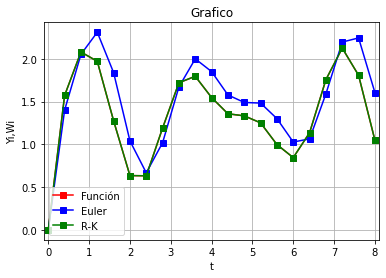

In [17]:
#RUNGE KUTA K=4, WITH EULER
import numpy as np
import math as ma
import matplotlib.pyplot as plt

a=0
b=8
N=20

alp=1
W1=np.zeros(N+1)

#Ecuación
def f(t,y):
   # 1 (a)
    #return t*np.e**(3*t)-2*y
  #1 (b)
   #return 1+pow(t-y,2)
  # 1 (c)
   # return 1+(y/t)
  # 1 (d)
    return np.cos(2*t)+np.sin(3*t)
   #return ( Om / (w) + Or / (w)**2 + OA * (w)**2  )**0.5*Ho
#Solución
def g(t):
#1 (a)
  #return (1/5)*t*pow(np.e,3*t)-(1/25)*pow(np.e,3*t)+(1/25)*pow(np.e,-2*t)
#1 (b)
  #return t+(1/(1-t))
#1 (c)
  #return t*ma.log(t)+2*t
#1 (d)
  return (1/2)*ma.sin(2*t)-(1/3)*ma.cos(3*t)+(4/3)

h=(b-a)/N
t=a
w=alp
print("ti       R-K         yi        Error\n")
for i in range(1,N+1):
  K0 = h*f(t,w)
  K1 = h*f(t + h/2.0, w + K0/2.0)
  K2 = h*f(t + h/2.0, w + K1/2.0)
  K3 = h*f(t + h, w + K2)
  w=w+(K0+2*K1+2*K2+K3)/6
  t=a+i*h
  y = g(t)
  E = abs(y-w)
  W1[i]=w
  print('{:1.1f}  {:10.8f}  {:10.8f}   {:10.8f}'.format(t, w, y, E))

##############################Euler############################################
Y=np.zeros(N+1)
W=np.zeros(N+1)
T=np.zeros(N+1)

y=0
t=a
w=alp
print("\n\nti       Euler          yi        Error\n")
#print('{:1.1f}  {:10.8f}  {:10.8f}   {:10.8f}'.format(t, w, y, E))

for i in range(1,N+1):
  w += h*f(t,w)
  t=a+i*h
  y=g(t)
  E=abs(y-w)
  Y[i]=y
  W[i]=w
  T[i]=t
  print('{:1.1f}  {:10.8f}  {:10.8f}   {:10.8f}'.format(t, w, y, E))
  
plt.plot(T, Y, "s-r", label="Función")
plt.plot(T, W, "s-b", label = "Euler")
plt.plot(T, W1, "s-g", label = "R-K")

plt.xlim([a-0.1,b+0.1])
plt.xlabel("t")
plt.ylabel("Yi,Wi")
plt.legend(loc = "lower left")
plt.title("Grafico")
plt.grid()

In [18]:
#COMPOSE SIMPSON, NUMERICAL INTEGRATION
import numpy as np
import math as ma
a=np.e
b=a+2
n=8
def f(x):
    #return x*ma.log(x)

#def f(x):
    #return 2/(x**2+4)

#def f(x):
    #return np.e**(2*x)*np.sin(3*x)

 #def f(x):
   # return 1/ma.sqrt(x**2-4)     

 #def f(x):
    #return x**3*np.e**x       

 #def f(x):
    #return x**2*np.cos(x)       

 #def f(x):
    #return x/(x**2+4)      

 #def f(x):
    #return np.tan(x)      
 #####################################
 #def f(x):
    return (np.cos(x))       

 #def f(x):
    #return (np.sin(x))**2-2*x*np.sin(x)+1       

 #def f(x):
    #return x*ma.log(x+1)       

 #def f(x):
    #return 1/(x*ma.log(x))       
   
h = (b-a)/n
Xl0 = f(a) + f(b)
Xl1 = 0.
Xl2 = 0.

for i in range(1,n):
    X = a + i*h
    if i%2 == 0:
      Xl2 += f(X)
    else:
      Xl1 += f(X)
           
Xl = h*(Xl0 + 2.*Xl2 + 4.*Xl1) / 3

print(Xl)



-1.4107947725592476
